# 2. Words as features

In [2]:
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from gensim.downloader import load

# 2.1 Processing the dataset;Displayed the number of tokens in the dataset

In [3]:
with open("goemotions.json", "r") as data:
    file = pd.read_json(data)
    
emotion = file[1].value_counts().to_dict()
sentiment = file[2].value_counts().to_dict()

posts = file[0].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(posts)

print(f"The size of the vocabulary is {len(X.toarray()[0])}")



The size of the vocabulary is 30449


# 2.2 Split the dataset

In [10]:
#get the location
emo = preprocessing.LabelEncoder()
senti = preprocessing.LabelEncoder()

#vectorizing emotions
emo= emo.fit_transform(file[1]) 
#vectorizing sentiments
senti = senti.fit_transform(file[2]) 

#now splitting the data 
X_train,X_test,Yemo_train, Yemo_test,Ysenti_train, Ysenti_test = train_test_split(X,file[1],file[2], test_size = 0.2, train_size=0.8)

# 2.3 & 2.4 Classifiers and metrics

## 2.3.3 Base-MLP: a Multi-Layered Perceptron with the default parameters.

In [6]:
clf_obj = MLPClassifier(max_iter = 1)


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


The performance of Multilayer Perceptron with default parameters for emotions.

              precision    recall  f1-score   support

           0       0.49      0.53      0.51      2219
           1       0.47      0.56      0.51      1222
           2       0.35      0.29      0.31      1036
           3       0.19      0.16      0.17      1596
           4       0.25      0.14      0.18      2312
           5       0.25      0.17      0.20       712
           6       0.24      0.18      0.20      1006
           7       0.33      0.29      0.31      1142
           8       0.34      0.28      0.31       496
           9       0.21      0.15      0.18       940
          10       0.24      0.20      0.22      1522
          11       0.23      0.24      0.24       604
          12       0.25      0.19      0.21       307
          13       0.23      0.17      0.20       592
          14       0.41      0.38      0.40       353
          15       0.77      0.74      0.75      1394
 

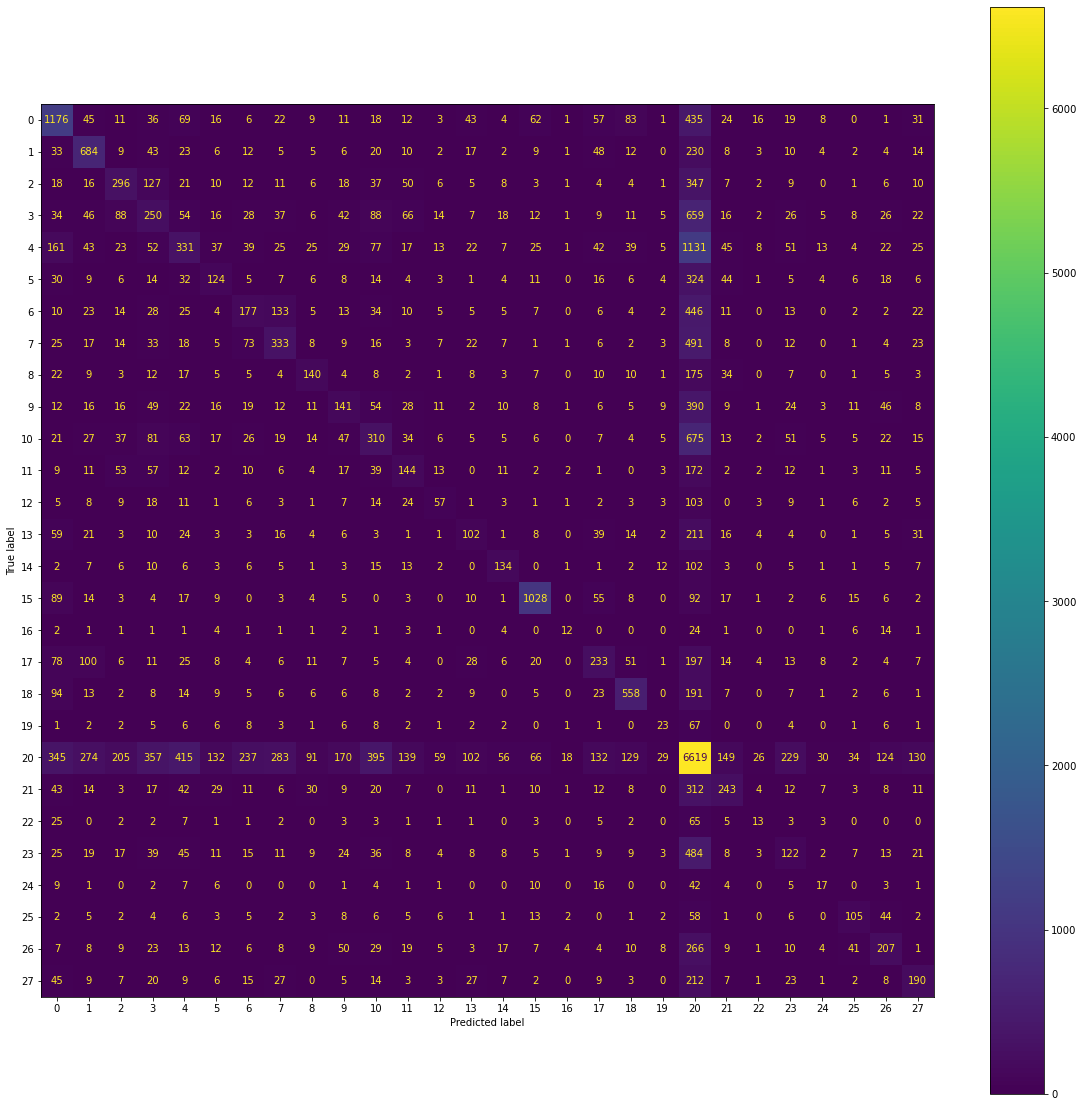

In [9]:
clf_obj.fit(X_train,Yemo_train)#training the data of emotions
pred = clf_obj.predict(X_test)

print("The performance of Multilayer Perceptron with default parameters for emotions.\n")
print(classification_report(Yemo_test, pred)) 
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


The performance of Multilayer Perceptrons classifier with default parameters for sentiments.

              precision    recall  f1-score   support

           0       0.46      0.23      0.31      3828
           1       0.57      0.51      0.54      7720
           2       0.48      0.61      0.54     11118
           3       0.69      0.67      0.68     11698

    accuracy                           0.57     34364
   macro avg       0.55      0.51      0.52     34364
weighted avg       0.57      0.57      0.56     34364



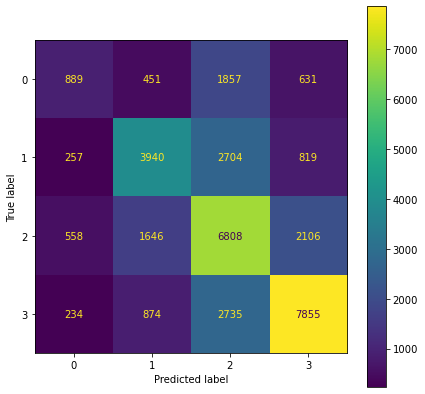

In [5]:
clf_obj.fit(X_train,Ysenti_train) #training the data of sentiments
pred = clf_obj.predict(X_test)

print("The performance of Multilayer Perceptrons classifier with default parameters for sentiments.\n")
print(classification_report(Ysenti_test, pred)) 
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax) 


## 2.3.6 Top-MLP: a better performing Multi-Layered Perceptron found using GridSearchCV.

In [5]:
param_grid=[
    { 'activation': ['logistic','tanh','relu','identity'], 'hidden_layer_sizes':[(30,50),(10,10,10)], 'solver':['adam','sgd']}
]


In [ ]:
#training the data of emotions using GridSearchCV
grid_search = GridSearchCV(clf_obj, param_grid, scoring='f1_weighted').fit(X_train,Yemo_train)
print("The best parameter is:  ")
print(grid_search.best_params_)


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.51      0.53      0.52      2096
           1       0.54      0.64      0.59      1213
           2       0.40      0.20      0.27      1074
           3       0.24      0.01      0.03      1694
           4       0.45      0.05      0.09      2240
           5       0.24      0.04      0.07       702
           6       0.32      0.07      0.11      1018
           7       0.33      0.13      0.19      1203
           8       0.49      0.16      0.24       459
           9       0.17      0.01      0.02       987
          10       0.26      0.03      0.05      1554
          11       0.37      0.14      0.20       584
          12       0.00      0.00      0.00       298
          13       0.55      0.07      0.12       558
          14       0.58      0.13      0.21       319
          15       0.77      0.77      0.77      1428
          16       0.00      0.00      0.00        77
          17       0.37    

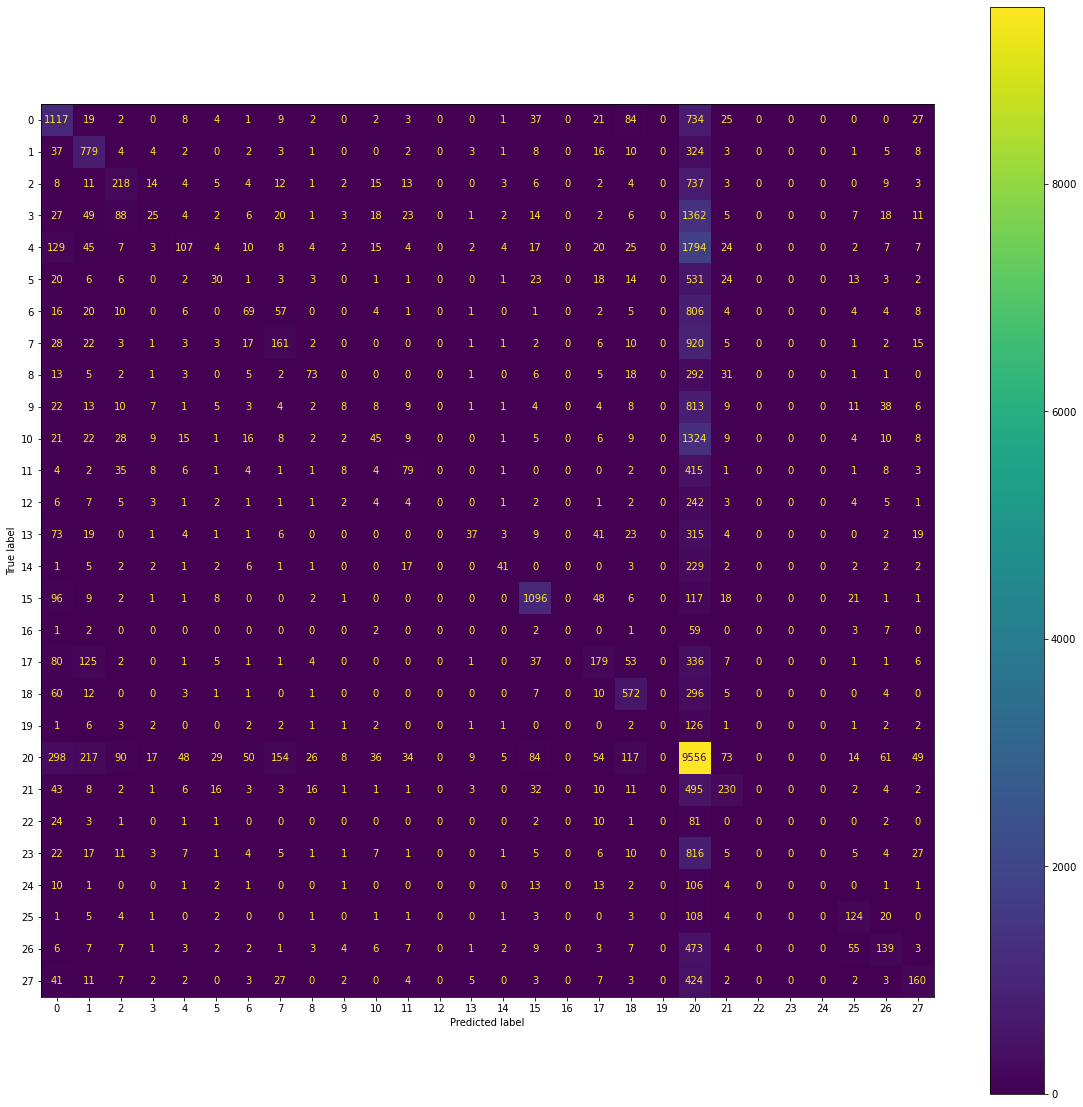

In [26]:
pred = grid_search.predict(X_test)

print(classification_report(Yemo_test, pred))

cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 

In [7]:
#training the data of sentiments using GridSearchCV
grid_search = GridSearchCV(clf_obj, param_grid, scoring='f1_weighted').fit(X_train,Ysenti_train)
print("The best parameter is:  ")
print(grid_search.best_params_)


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

The best parameter is:  
{'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.45      0.22      0.30      3783
           1       0.55      0.55      0.55      7794
           2       0.49      0.57      0.52     11020
           3       0.67      0.68      0.68     11767

    accuracy                           0.56     34364
   macro avg       0.54      0.51      0.51     34364
weighted avg       0.56      0.56      0.56     34364



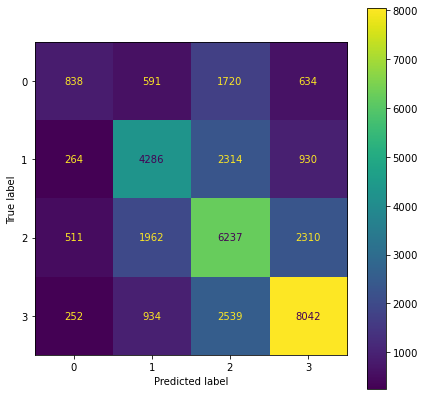

In [9]:
pred = grid_search.predict(X_test)

print(classification_report(Ysenti_test, pred))

cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax) 

# 2.5 Different train-test-split

We are using 50% training set and 50% test set, In this case the accuracy and other metrics would slightly change or decrease,because the test size is bigger as compared to previous section and train size is small, the downside is that, the model would not be generalized because of less training and data.

In [12]:
X_train, X_test, Yemo_train, Yemo_test, Ysenti_train, Ysenti_test = train_test_split(X, emo, senti, test_size = 0.5, train_size=0.5)

## 2.3.3 Base-MLP: a Multi-Layered Perceptron with the default parameters.

In [13]:
clf_obj2 = MLPClassifier(max_iter = 1)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


The performance of Multilayer Perceptron with default parameters for emotions.

              precision    recall  f1-score   support

           0       0.52      0.47      0.50      5348
           1       0.55      0.51      0.53      3061
           2       0.40      0.14      0.21      2589
           3       0.22      0.02      0.03      4159
           4       0.45      0.04      0.07      5694
           5       0.25      0.04      0.07      1717
           6       0.48      0.05      0.09      2484
           7       0.46      0.08      0.14      2938
           8       0.44      0.16      0.24      1055
           9       0.27      0.01      0.02      2277
          10       0.25      0.03      0.05      3872
          11       0.71      0.07      0.12      1465
          12       0.00      0.00      0.00       749
          13       0.69      0.04      0.07      1507
          14       0.58      0.02      0.05       895
          15       0.83      0.74      0.79      3513
 

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


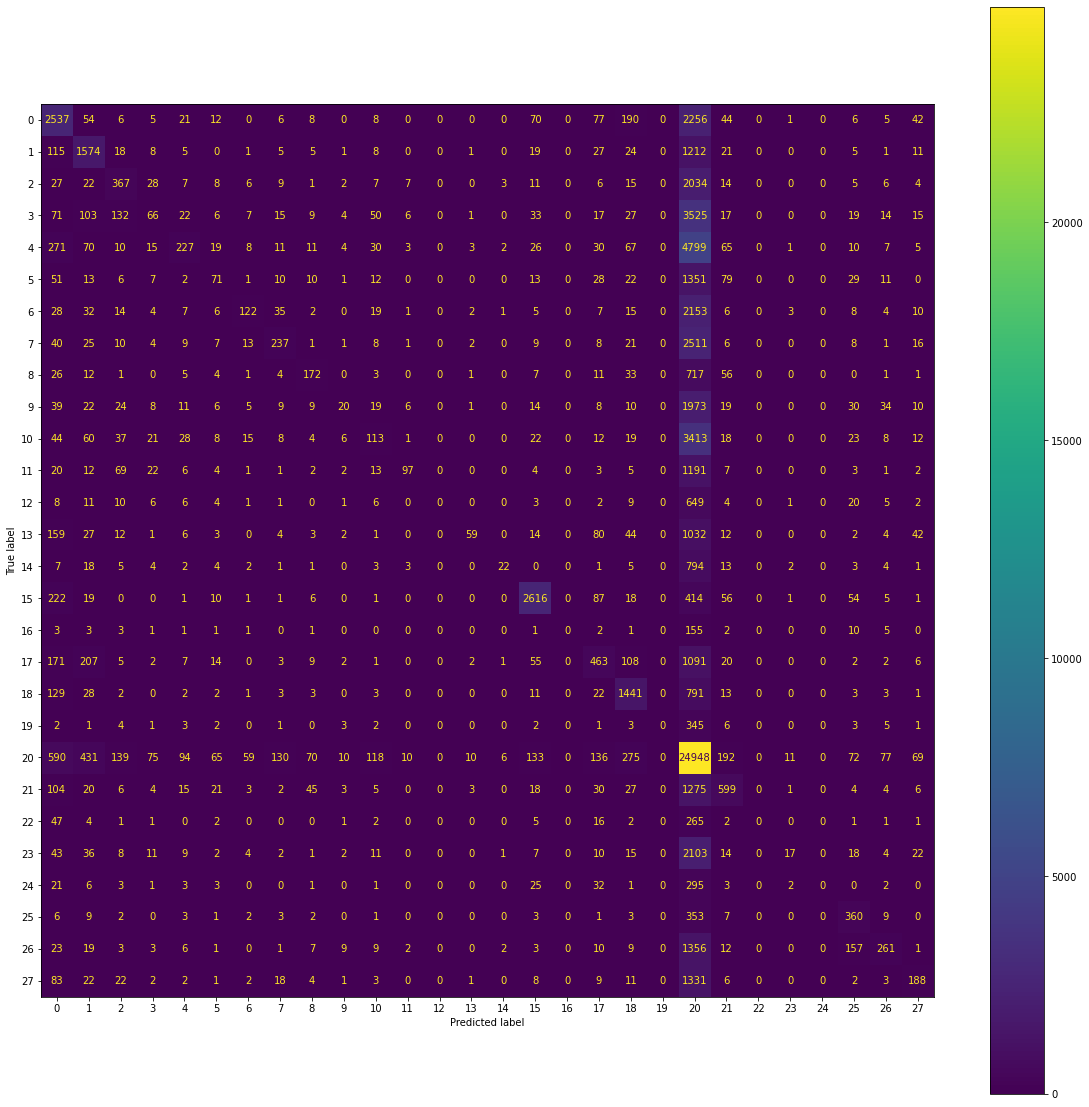

In [16]:
clf_obj2.fit(X_train,Yemo_train)#training the data of emotions
pred = clf_obj2.predict(X_test)

print("The performance of Multilayer Perceptron with default parameters for emotions.\n")
print(classification_report(Yemo_test, pred)) 
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


The performance of Multilayer Perceptrons classifier with default parameters for sentiments.

              precision    recall  f1-score   support

           0       0.46      0.20      0.27      9481
           1       0.57      0.46      0.51     19240
           2       0.47      0.62      0.53     27720
           3       0.67      0.68      0.67     29469

    accuracy                           0.56     85910
   macro avg       0.54      0.49      0.50     85910
weighted avg       0.56      0.56      0.55     85910



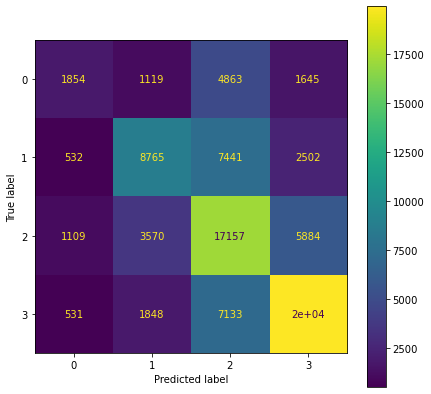

In [17]:
clf_obj2.fit(X_train,Ysenti_train) #training the data of sentiments
pred = clf_obj2.predict(X_test)

print("The performance of Multilayer Perceptrons classifier with default parameters for sentiments.\n")
print(classification_report(Ysenti_test, pred)) 
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax) 

## 2.3.6 Top-MLP: a better performing Multi-Layered Perceptron found using GridSearchCV.

In [18]:
param_grid=[
    { 'activation': ['logistic','tanh','relu','identity'], 'hidden_layer_sizes':[(30,50),(10,10,10)], 'solver':['adam','sgd']}
]


In [19]:
#training the data of emotions using GridSearchCV
grid_search = GridSearchCV(clf_obj2, param_grid, scoring='f1_weighted').fit(X_train,Yemo_train)
print("The best parameter is:  ")
print(grid_search.best_params_)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

The best parameter is:  
{'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      0.47      0.48      5348
           1       0.52      0.59      0.56      3061
           2       0.36      0.15      0.21      2589
           3       0.17      0.03      0.06      4159
           4       0.37      0.01      0.02      5694
           5       0.26      0.02      0.04      1717
           6       0.43      0.03      0.05      2484
           7       0.37      0.07      0.12      2938
           8       0.46      0.14      0.21      1055
           9       0.00      0.00      0.00      2277
          10       0.19      0.05      0.07      3872
          11       0.56      0.02      0.04      1465
          12       0.00      0.00      0.00       749
          13       0.58      0.02      0.04      1507
          14       0.47      0.07      0.12       895
          15       0.76      0.77      0.77      3513
          16       0.00      0.00      0.00       190
          17       0.39    

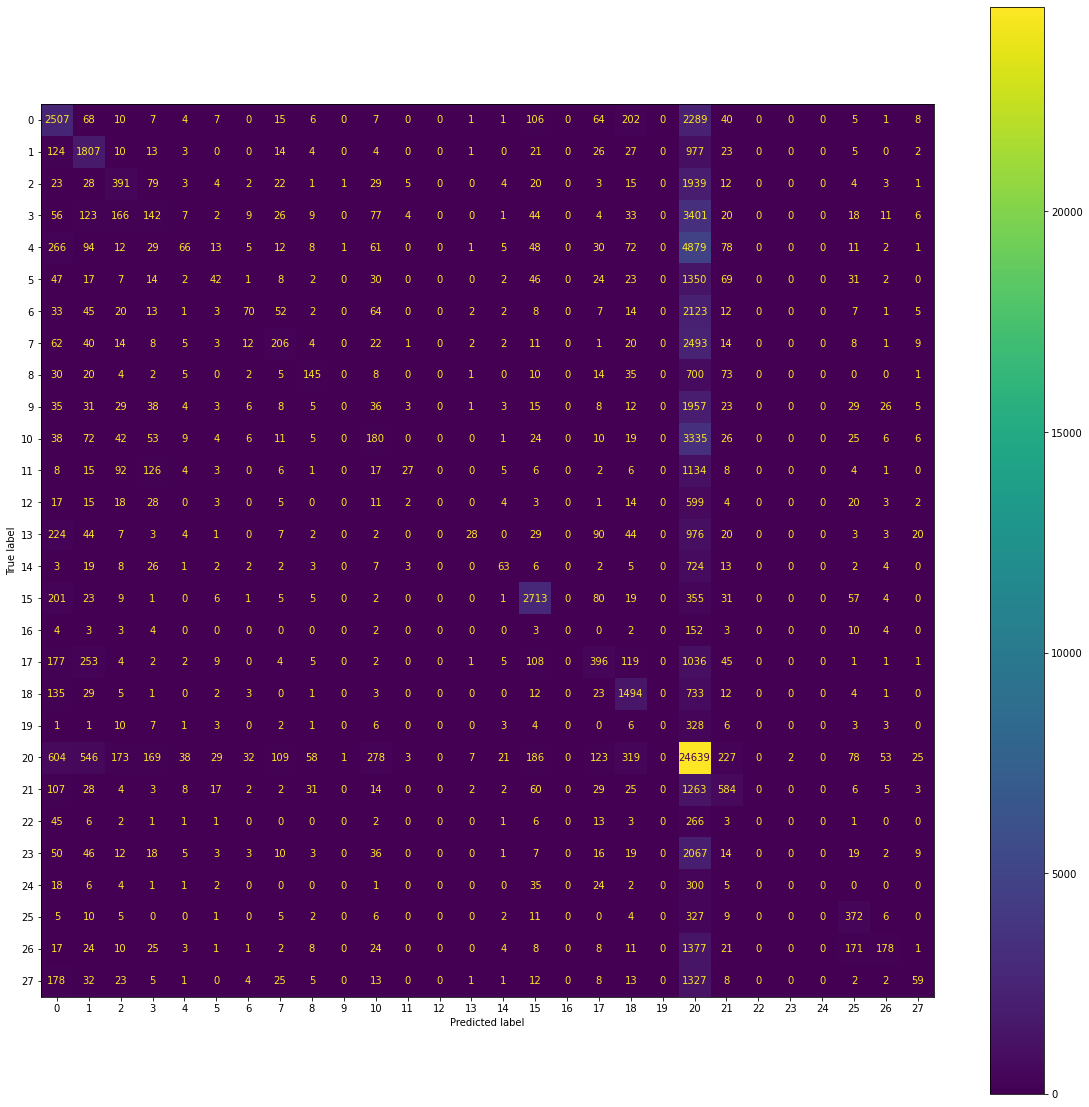

In [20]:
pred = grid_search.predict(X_test)

print(classification_report(Yemo_test, pred))

cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 

In [22]:
#training the data of sentiments using GridSearchCV
grid_search = GridSearchCV(clf_obj2, param_grid, scoring='f1_weighted').fit(X_train,Ysenti_train)
print("The best parameter is:  ")
print(grid_search.best_params_)


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

The best parameter is:  
{'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.44      0.20      0.28      9481
           1       0.54      0.54      0.54     19240
           2       0.48      0.55      0.52     27720
           3       0.66      0.69      0.67     29469

    accuracy                           0.56     85910
   macro avg       0.53      0.49      0.50     85910
weighted avg       0.55      0.56      0.55     85910



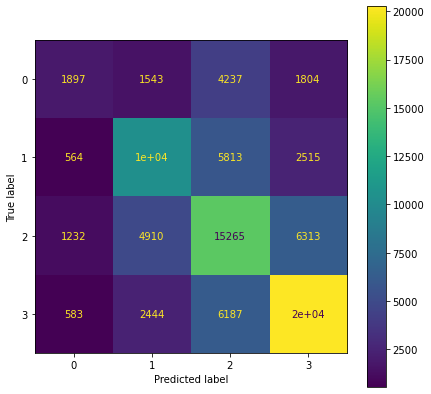

In [23]:
pred = grid_search.predict(X_test)

print(classification_report(Ysenti_test, pred))

cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax) 